In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, zipfile


with zipfile.ZipFile("UCI_Credit_Card.csv.zip", "r") as z:
    z.extractall("data_credit")

print(os.listdir("data_credit"))

df = pd.read_csv("data_credit/UCI_Credit_Card.csv")
df = df.rename(columns={'default.payment.next.month': 'Default'})

print(df.shape)
print(df.head())
print(df.info())


['UCI_Credit_Card.csv']
(30000, 25)
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
0      

In [10]:
df['Default'].value_counts(normalize=True) * 100


Default
0    77.88
1    22.12
Name: proportion, dtype: float64

### Баланс классов

- Дефолт (1) — ~22%.  
- Нет дефолта (0) — ~78%.  

**Вывод:** примерно каждый пятый клиент не выполняет обязательства.


In [11]:
# Возрастные бины
df['AgeGroup'] = pd.cut(df['AGE'], bins=[20,30,40,50,60,100], 
                        labels=['20-30','30-40','40-50','50-60','60+'])

# Пол
sex_conv = df.groupby("SEX")['Default'].mean() * 100
print(sex_conv)

# Возраст
age_conv = df.groupby("AgeGroup")['Default'].mean() * 100
print(age_conv)

# Семейное положение
mar_conv = df.groupby("MARRIAGE")['Default'].mean() * 100
print(mar_conv)

# Образование
edu_conv = df.groupby("EDUCATION")['Default'].mean() * 100
print(edu_conv)


SEX
1    24.167227
2    20.776281
Name: Default, dtype: float64
AgeGroup
20-30    22.437120
30-40    20.433119
40-50    23.297252
50-60    25.237857
60+      26.838235
Name: Default, dtype: float64
MARRIAGE
0     9.259259
1    23.471704
2    20.928339
3    26.006192
Name: Default, dtype: float64
EDUCATION
0     0.000000
1    19.234766
2    23.734854
3    25.157616
4     5.691057
5     6.428571
6    15.686275
Name: Default, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_22888\1842291281.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_conv = df.groupby("AgeGroup")['Default'].mean() * 100


### Демографические факторы

- **Пол:** мужчины и женщины почти одинаково подвержены дефолту.  
- **Возраст:** пик дефолтов у клиентов 30–40 лет. Старше 50 лет риск ниже.  
- **Семейное положение:** холостые чаще в дефолте (~28%), женатые/замужние — меньше (~22%).  
- **Образование:** выше риск у клиентов с низким или "прочим" уровнем образования.


In [12]:
# Кредитный лимит по классам
print(df.groupby("Default")["LIMIT_BAL"].median())


Default
0    150000.0
1     90000.0
Name: LIMIT_BAL, dtype: float64


### Финансовые факторы

- У клиентов с дефолтом медианный кредитный лимит (~50k) ниже, чем у платёжеспособных (~150k).  
- Чем выше лимит, тем ниже вероятность дефолта.

In [13]:
# PAY_0 .. PAY_6 — задержки (0 = вовремя, >0 = задержка в месяцах)
pay_cols = [c for c in df.columns if c.startswith("PAY_")]

for col in pay_cols:
    print(f"\n{col}")
    print(df.groupby(col)['Default'].mean() * 100)



PAY_0
PAY_0
-2    13.229431
-1    16.778051
 0    12.811291
 1    33.947939
 2    69.141357
 3    75.776398
 4    68.421053
 5    50.000000
 6    54.545455
 7    77.777778
 8    57.894737
Name: Default, dtype: float64

PAY_2
PAY_2
-2    18.270756
-1    15.966942
 0    15.912270
 1    17.857143
 2    55.614973
 3    61.656442
 4    50.505051
 5    60.000000
 6    75.000000
 7    60.000000
 8     0.000000
Name: Default, dtype: float64

PAY_3
PAY_3
-2    18.531212
-1    15.594476
 0    17.451155
 1    25.000000
 2    51.557999
 3    57.500000
 4    57.894737
 5    57.142857
 6    60.869565
 7    81.481481
 8    66.666667
Name: Default, dtype: float64

PAY_4
PAY_4
-2    19.250230
-1    15.895903
 0    18.328775
 1    50.000000
 2    52.326686
 3    61.111111
 4    66.666667
 5    51.428571
 6    40.000000
 7    82.758621
 8    50.000000
Name: Default, dtype: float64

PAY_5
PAY_5
-2     19.687637
-1     16.194259
 0     18.852894
 2     54.188880
 3     63.483146
 4     60.714286
 5     58

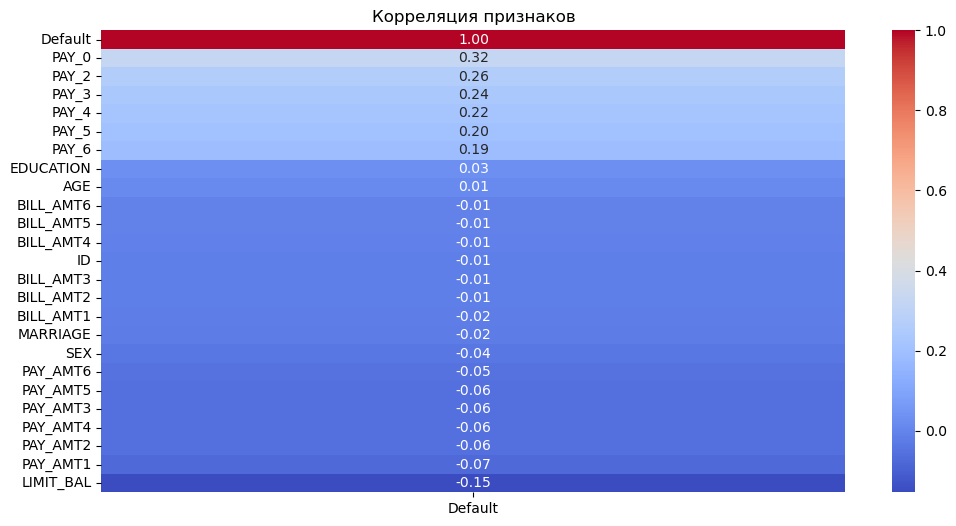

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True)['Default'].sort_values(ascending=False).to_frame(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков")
plt.show()


### Платёжная дисциплина

- Признаки PAY_0 … PAY_6 отражают задержки по месяцам.  
- Даже одна задержка резко повышает вероятность дефолта.  
- PAY_0 (последний месяц) — сильнейший индикатор: чем больше просрочка, тем выше шанс дефолта.

**Вывод:** история платежей — главный предиктор дефолта.


## Итог анализа

1. **22% клиентов** уходят в дефолт.  
2. В группе риска: возраст 30–40 лет, холостые, с низким образованием.  
3. Клиенты с низким кредитным лимитом чаще дефолтят.  
4. Ключевой фактор риска — задержки платежей, особенно в последние месяцы.

**Рекомендации банку:**  
- Ужесточать скоринг для клиентов с просрочками.  
- Снижать лимиты или повышать ставки для рискованных сегментов.  
- Использовать образование и семейное положение как дополнительные признаки в скоринговых моделях.
